# load dataset

In [1]:
import pandas as pd
df1 = pd.read_csv("student-scores.csv")
df = df1.copy()
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [24]:
df.shape

(2000, 15)

# drop irrelevant columns

In [2]:
df.columns
df.drop(columns=['id','first_name','last_name','email'],axis=1, inplace=True)

# create new features from all score

In [3]:
df["total_score"] = df["math_score"] + df["history_score"] + df["physics_score"] + df["chemistry_score"] + df["biology_score"] + df["english_score"] + df["geography_score"]
df["average_score"] = df["total_score"] / 7
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


In [4]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


# Encoding Categorical Columns

In [5]:
gender_map = {'male': 0, 'female': 1}
part_time_job_map = {False: 0, True: 1}
extracurricular_activities_map = {False: 0, True: 1}
career_aspiration_map = {
        'Lawyer': 0, 'Doctor': 1, 'Government Officer': 2, 'Artist': 3, 'Unknown': 4,
        'Software Engineer': 5, 'Teacher': 6, 'Business Owner': 7, 'Scientist': 8,
        'Banker': 9, 'Writer': 10, 'Accountant': 11, 'Designer': 12,
        'Construction Engineer': 13, 'Game Developer': 14, 'Stock Investor': 15,
        'Real Estate Developer': 16
    }
df['gender'] = df['gender'].map(gender_map)
df['part_time_job'] = df['part_time_job'].map(part_time_job_map)
df['extracurricular_activities'] = df['extracurricular_activities'].map(extracurricular_activities_map)
df['career_aspiration'] = df['career_aspiration'].map(career_aspiration_map)

In [6]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,0,0,3,0,27,0,73,81,93,97,63,80,87,574,82.000000
1,1,0,2,0,47,1,90,86,96,100,90,88,90,640,91.428571
2,1,0,9,1,13,2,81,97,95,96,65,77,94,605,86.428571
3,1,0,5,0,3,3,71,74,88,80,89,63,86,551,78.714286
4,0,0,5,0,10,4,84,77,65,65,80,74,76,521,74.428571


# Balance Dataset

In [7]:
df['career_aspiration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [8]:
df['career_aspiration'].value_counts()

career_aspiration
5     315
7     309
4     223
9     169
0     138
11    126
1     119
16     83
15     73
13     68
3      67
14     63
2      61
6      59
12     56
8      39
10     32
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [11]:
X_train.shape

(4284, 14)

# Feature Scalling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled.shape

(4284, 14)

# Models Training (Multiple Models)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}
for name, model in models.items():
    print("="*50)
    print("Model:", name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)


Model: Logistic Regression
Accuracy: 0.48739495798319327
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.54      0.49        68
           1       0.49      0.62      0.55        72
           2       0.42      0.44      0.43        57
           3       0.52      0.57      0.55        58
           4       0.31      0.17      0.22        66
           5       0.32      0.32      0.32        76
           6       0.58      0.92      0.71        71
           7       0.83      0.90      0.87        61
           8       0.41      0.45      0.43        53
           9       0.29      0.10      0.15        61
          10       0.59      0.71      0.65        63
          11       0.44      0.45      0.45        53
          12       0.31      0.16      0.21        68
          13       0.38      0.49      0.43        55
          14       0.61      0.93      0.74        57
          15       0.37      0.24      0.29        63


In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, y_train, y_test have already been defined and split from the dataset
# Ensure the features are scaled for optimal performance in most classifiers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# List to store model performance metrics
model_metrics = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append metrics to the list
    model_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert the list to a DataFrame for tabular display
metrics_table = pd.DataFrame(model_metrics)
print(metrics_table)


                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.487395   0.461321  0.487395  0.460178
1     Support Vector Classifier  0.647059   0.645258  0.647059  0.628081
2      Random Forest Classifier  0.832866   0.830849  0.832866  0.824328
3           K Nearest Neighbors  0.677871   0.659256  0.677871  0.657924
4      Decision Tree Classifier  0.684407   0.681953  0.684407  0.679793
5          Gaussian Naive Bayes  0.309991   0.451645  0.309991  0.289571
6           AdaBoost Classifier  0.233427   0.130272  0.233427  0.143391
7  Gradient Boosting Classifier  0.739496   0.728417  0.739496  0.722294
8            XGBoost Classifier  0.827264   0.826537  0.827264  0.819717


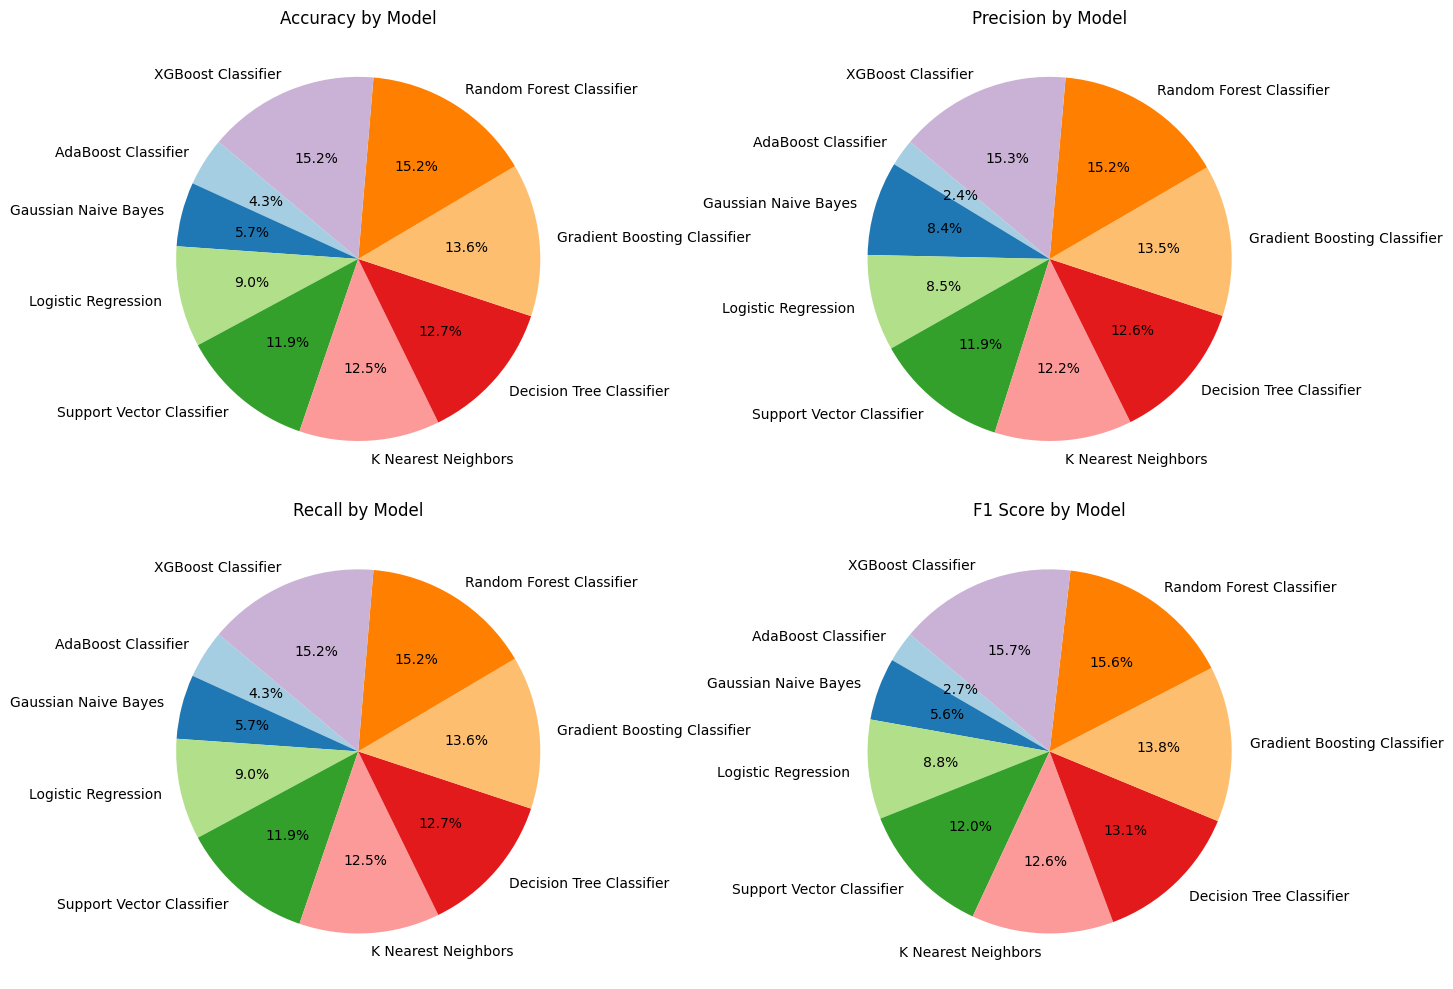

In [27]:
import matplotlib.pyplot as plt

# Sort the DataFrame by accuracy for better visualization (already sorted by Accuracy)
metrics_table_sorted = metrics_table.sort_values(by="Accuracy", ascending=True).reset_index(drop=True)

# Define colors for each model
colors = plt.cm.Paired(range(len(metrics_table_sorted)))

# Plot pie charts for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 subplot grid

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    ax.pie(
        metrics_table_sorted[metric],
        labels=metrics_table_sorted["Model"],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors
    )
    ax.set_title(f"{metric} by Model")

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, y_train, y_test have already been defined and split from the dataset
# Ensure the features are scaled for optimal performance in most classifiers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# List to store model performance metrics
model_metrics = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append metrics to the list
    model_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert the list to a DataFrame for tabular display
metrics_table = pd.DataFrame(model_metrics)

# Sort the table by accuracy in ascending order
metrics_table_sorted = metrics_table.sort_values(by="Accuracy", ascending=True).reset_index(drop=True)
print(metrics_table_sorted)

                          Model  Accuracy  Precision    Recall  F1 Score
0           AdaBoost Classifier  0.233427   0.130272  0.233427  0.143391
1          Gaussian Naive Bayes  0.309991   0.451645  0.309991  0.289571
2           Logistic Regression  0.487395   0.461321  0.487395  0.460178
3     Support Vector Classifier  0.647059   0.645258  0.647059  0.628081
4           K Nearest Neighbors  0.677871   0.659256  0.677871  0.657924
5      Decision Tree Classifier  0.688142   0.682018  0.688142  0.682001
6  Gradient Boosting Classifier  0.738562   0.727469  0.738562  0.721229
7      Random Forest Classifier  0.823529   0.821898  0.823529  0.813256
8            XGBoost Classifier  0.827264   0.826537  0.827264  0.819717


# Model Selection (Random Forest)

In [15]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Report: ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Accuracy:  0.834733893557423
Report:                precision    recall  f1-score   support

           0       0.78      0.87      0.82        68
           1       0.81      0.99      0.89        72
           2       0.75      1.00      0.86        57
           3       0.90      0.93      0.92        58
           4       0.83      0.44      0.57        66
           5       0.54      0.37      0.44        76
           6       0.95      1.00      0.97        71
           7       0.95      0.93      0.94        61
           8       0.74      0.98      0.85        53
           9       0.75      0.80      0.78        61
          10       0.91      0.98      0.95        63
          11       0.88      0.72      0.79        53
          12       0.97      0.87      0.91        68
          13       0.78      0.91      0.84        55
          14       0.88      1.00      0.93        57
          15       0.89      0.76      0.82        63
          16       0.90      0.77      0.83

# Single Input Predictions

In [16]:
print("Actual Label :", y_test.iloc[10])
print("Model Prediction :",model.predict(X_test_scaled[10].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 12
Model Prediction : 12
Wow! Model doing well.....


In [17]:
print("Actual Label :", y_test.iloc[300])
print("Model Prediction :",model.predict(X_test_scaled[300].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 0
Model Prediction : 0
Wow! Model doing well.....


In [18]:
print("Actual Label :", y_test.iloc[23])
print("Model Prediction :",model.predict(X_test_scaled[23].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 3
Model Prediction : 3
Wow! Model doing well.....


# Saving & Load Files

In [19]:
import pickle

pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(model,open("model.pkl",'wb'))

In [20]:
scaler = pickle.load(open("scaler.pkl", 'rb'))
model = pickle.load(open("model.pkl", 'rb'))

# Recommendation System

In [21]:
import pickle
import numpy as np

scaler = pickle.load(open("scaler.pkl", 'rb'))
model = pickle.load(open("model.pkl", 'rb'))
class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score,average_score):
    
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0
    
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score,total_score,average_score]])
    
    # Scale features
    scaled_features = scaler.transform(feature_array)
    probabilities = model.predict_proba(scaled_features)
    top_classes_idx = np.argsort(-probabilities[0])[:5]
    top_classes_names_probs = [(class_names[idx], probabilities[0][idx]) for idx in top_classes_idx]
    
    return top_classes_names_probs

In [22]:
# Example usage 1
final_recommendations = Recommendations(gender='female',
                                        part_time_job=False,
                                        absence_days=2,
                                        extracurricular_activities=False,
                                        weekly_self_study_hours=7,
                                        math_score=65,
                                        history_score=60,
                                        physics_score=97,
                                        chemistry_score=94,
                                        biology_score=71,
                                        english_score=81,
                                        geography_score=66,
                                        total_score=534,
                                        average_score=76.285714)

print("Top recommended studies with probabilities:")
print("=")
for class_name, probability in final_recommendations:
    print(f"{class_name} with probability {probability}")

Top recommended studies with probabilities:
=
Teacher with probability 0.8
Real Estate Developer with probability 0.06
Government Officer with probability 0.05
Unknown with probability 0.05
Designer with probability 0.01


In [23]:
# Example usage 2
final_recommendations = Recommendations(gender='female',
                                        part_time_job=False,
                                        absence_days=2,
                                        extracurricular_activities=False,
                                        weekly_self_study_hours=4,
                                        math_score=87,
                                        history_score=73,
                                        physics_score=98,
                                        chemistry_score=91,
                                        biology_score=79,
                                        english_score=60,
                                        geography_score=77,
                                        total_score=583,
                                        average_score=83.285714)

print("Top recommended studies with probabilities:")
print("="*50)
for class_name, probability in final_recommendations:
    print(f"{class_name} with probability {probability}")


Top recommended studies with probabilities:
Artist with probability 0.51
Game Developer with probability 0.23
Real Estate Developer with probability 0.17
Unknown with probability 0.04
Construction Engineer with probability 0.01
